In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np
import networkx as nx
from scipy.stats import norm
import math as ma

In [2]:
np.random.seed(1234)

# Reading the data

In [3]:
net1 = pd.read_csv('net1.txt', sep='\s', header = None, engine='python')
net1.columns=['i','j']
net2 = pd.read_csv('net2.txt', sep='\s', header = None, engine='python')
net2.columns=['i','j']

# Task 1

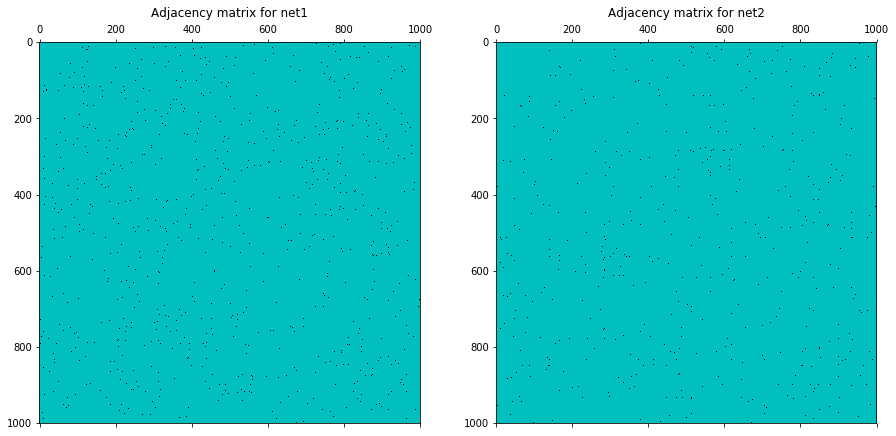

In [4]:
#Adjacency matrix for net1
d1=1000
am1=np.zeros((d1,d1))

am1[net1['i'],net1['j']]=1
am1[net1['j'],net1['i']]=1

am1=pd.DataFrame(am1)

#Adjacency matrix for net2
d2=1000
am2=np.zeros((d2,d2))

am2[net2['i'],net2['j']]=1
am2[net2['j'],net2['i']]=1

am2=pd.DataFrame(am2)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

cmap = ListedColormap(['c', 'k'])

ax1.matshow(am1, cmap=cmap)
ax1.set_title('Adjacency matrix for net1')
ax2.matshow(am2, cmap=cmap)
ax2.set_title('Adjacency matrix for net2');

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


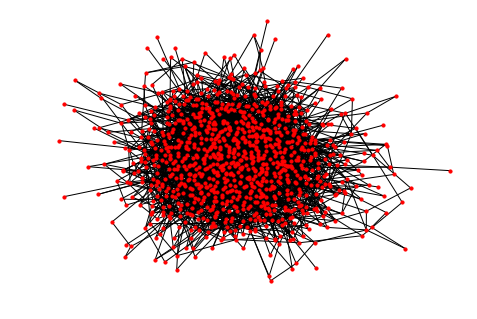

In [5]:
#creating the graphs from the from adjacency matrix
G1=nx.Graph(am1)
G2=nx.Graph(am2)

#fig1, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20,20))
nx.draw(G1, node_size=10)

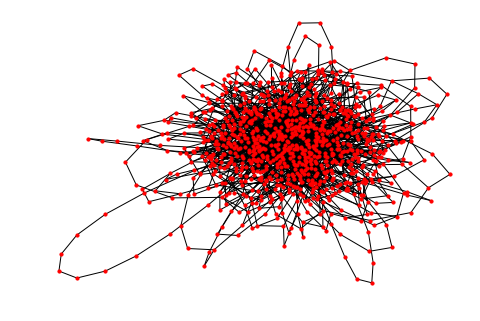

In [6]:
nx.draw(G2, node_size=10)

In [7]:
#computing degree

#net1
l=[]
for i in np.array(G1.degree())[:,1]:
    l.append(int(i))

degree1=pd.DataFrame(np.array(l), columns=['Degree'])
degree1['Degree2']=degree1['Degree'].values**2
  
#average of the degree
m1deg=degree1['Degree'].mean()
m1deg2=degree1['Degree2'].mean()

#net2
l=[]
for i in np.array(G2.degree())[:,1]:
    l.append(int(i))

degree2=pd.DataFrame(np.array(l), columns=['Degree'])
degree2['Degree2']=degree2['Degree'].values**2
    
#average of the degree
m2deg=degree2['Degree'].mean()
m2deg2=degree2['Degree2'].mean()

degrees=pd.DataFrame(np.array([m1deg,m1deg2,m2deg,m2deg2]).reshape(2,2), index=['Net1','Net2'], columns=['<k>','<k2>'])
degrees

,<k>,<k2>
Net1,5.146,31.53
Net2,3.592,23.67


The epidemic threshold in the SIS dynamics for the homogenous mean-field approximations is

$$\lambda_c = \frac{\mu}{\langle k \rangle}$$

for heterogenous mean-field 

$$\lambda_c = \frac{\mu \langle k \rangle}{\langle k^2 \rangle}$$

for quenched mean-field

$$\lambda_c = \frac{\mu}{\Lambda_{max} (A)}$$

In [8]:
#mu
mu=0.5

In [9]:
#homogeneous mean-field

MFlambda1 = mu/m1deg
MFlambda2 = mu/m2deg

#heterogenous mean-field

HMFlambda1 = mu*m1deg/m1deg2
HMFlambda2 = mu*m2deg/m2deg2

In [10]:
#computing avl of adjacency matrix

eigmax1=np.amax(np.real(np.linalg.eig(am1)[0]))
eigmax2=np.amax(np.real(np.linalg.eig(am2)[0]))

#quenched mean-field

QMFlambda1=mu/eigmax1
QMFlambda2=mu/eigmax2

In [11]:
lambdas=pd.DataFrame(np.array([MFlambda1, HMFlambda1, QMFlambda1, MFlambda2, HMFlambda2, QMFlambda2]).reshape(2,3), index=['Net1','Net2'], columns=['MF','HMF','QMF'])
lambdas

,MF,HMF,QMF
Net1,0.097163,0.081605,0.079566
Net2,0.139198,0.075877,0.066400


# Task 2

Possible reactions:

$$I \xrightarrow{\mu} S$$
$$S+I \xrightarrow{\lambda} I+I$$

Propensity rates:

$$a_1(I)=\mu I = W_{I \rightarrow I-1}$$

$$a_2(S,I) = \lambda \frac{(N-I)I}{N}$$

To find the minimum number of iterations for which the algorithm converges, many similations are performed with a value of lambda (set to 0.04) below the lowest critical one. The investigated number is the minimum value for which the number of infected is 0.

In [12]:
mu=0.5
N=1000

In [13]:
def Gyllespie(lamb):
        #number of iterations
        x=1000
    
        #random initializition
        #S=0, I=1
        I=0
        SI=np.hstack((np.ones(inf),np.zeros(1000-inf)))
        np.random.shuffle(SI)
        
        for y in range(x):
            
            #number of infected
            I=np.sum(SI)
            
            if I==0: continue
                
            #propensity rate
            a1=mu*I
            a2=lamb*(N-I)*I*c
            a0=a1+a2
    
            #choice of the reaction
            temp=np.random.rand()*a0
        
            if temp<a1: #the reaction is I->S
                i1, = np.where(SI == 1)
                f = np.random.choice(i1, 1)
                SI[f]=0

            else: #the reaction is S+I -> I+I
                check=0
                while check == 0:
                    s = np.random.choice(net.index, 1)
                    i = net.loc[s,'i']
                    j = net.loc[s,'j']
                    if SI[i]!=SI[j]: 
                        SI[i]=1
                        SI[j]=1
                        check=1
                        
        #at the end of the algorithm it returns the fraction of infected
        return I/N

In [14]:
def Convergence(x):
    
    IoverN=np.zeros(len(x))
    for i,j in enumerate(x):
        IoverN[i]=Gyllespie(j)    
        print('**** Iter =', j)
    return IoverN

In [15]:
def ManySimulations(lamb):    
        IoverN=np.zeros(100)  
        for i in range(100):
            IoverN[i]=Gyllespie(lamb)           
        return np.mean(IoverN)

## Network 1

In [15]:
#setting parameters
inf=50
net=net1
c=m1deg/999

#### Study of the convergence

In [48]:
#convergence
x=np.arange(100,4100,100)
iConv=Convergence(x)

**** Iter= 50
**** Iter= 150
**** Iter= 250
**** Iter= 350
**** Iter= 450
**** Iter= 550
**** Iter= 650
**** Iter= 750
**** Iter= 850
**** Iter= 950
**** Iter= 1050
**** Iter= 1150
**** Iter= 1250
**** Iter= 1350
**** Iter= 1450
**** Iter= 1550
**** Iter= 1650
**** Iter= 1750
**** Iter= 1850
**** Iter= 1950
**** Iter= 2050
**** Iter= 2150
**** Iter= 2250
**** Iter= 2350
**** Iter= 2450
**** Iter= 2550
**** Iter= 2650
**** Iter= 2750
**** Iter= 2850
**** Iter= 2950
**** Iter= 3050
**** Iter= 3150
**** Iter= 3250
**** Iter= 3350
**** Iter= 3450
**** Iter= 3550
**** Iter= 3650
**** Iter= 3750
**** Iter= 3850
**** Iter= 3950


In [49]:
#save data into a csv file
Val=np.vstack((np.array(x),np.array(iConv)))
ConvOut=pd.DataFrame(Val)
ConvOut.to_csv('ConvergenceNet1.csv',index=None)

In [16]:
#read the results
ConvIn = pd.read_csv('ConvergenceNet1.csv').T
ConvIn.index=np.arange(0,40)
ConvIn.loc[-1]=[0,inf/N]
ConvIn.index= ConvIn.index+1
ConvIn.sort_index(inplace=True)
ConvIn.columns=['Iter','i']
ConvIn.T

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
Iter,0.00,50.000,150.000,250.000,350.000,450.0,550.0,650.0,750.0,850.0,...,3050.0,3150.0,3250.0,3350.0,3450.0,3550.0,3650.0,3750.0,3850.0,3950.0
i,0.05,0.037,0.033,0.007,0.049,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


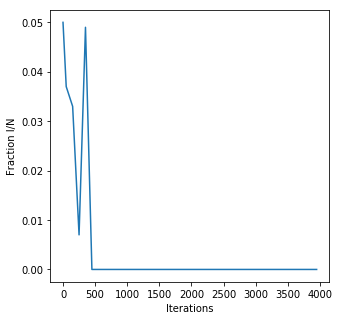

In [17]:
#plot results of convergence
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel('Iterations')
ax.set_ylabel('Fraction I/N')
ax.plot(ConvIn['Iter'],ConvIn['i']);

#### Simulation

In [18]:
#lambdas proposed
lambdas=np.linspace(0.04,1,50)

In [57]:
#Gyllespie
lmean=np.zeros(50)
for e in range(50):
    print(50-e,'*** Lambda = ', lambdas[e])
    lmean[e]=ManySimulations(lambdas[e])

50 *** Lambda =  0.04
49 *** Lambda =  0.05959183673469388
48 *** Lambda =  0.07918367346938776
47 *** Lambda =  0.09877551020408162
46 *** Lambda =  0.11836734693877551
45 *** Lambda =  0.13795918367346938
44 *** Lambda =  0.15755102040816327
43 *** Lambda =  0.17714285714285713
42 *** Lambda =  0.19673469387755102
41 *** Lambda =  0.2163265306122449
40 *** Lambda =  0.23591836734693877
39 *** Lambda =  0.2555102040816326
38 *** Lambda =  0.2751020408163265
37 *** Lambda =  0.2946938775510204
36 *** Lambda =  0.3142857142857142
35 *** Lambda =  0.3338775510204081
34 *** Lambda =  0.353469387755102
33 *** Lambda =  0.3730612244897959
32 *** Lambda =  0.3926530612244898
31 *** Lambda =  0.4122448979591836
30 *** Lambda =  0.4318367346938775
29 *** Lambda =  0.4514285714285714
28 *** Lambda =  0.47102040816326524
27 *** Lambda =  0.4906122448979591
26 *** Lambda =  0.5102040816326531
25 *** Lambda =  0.529795918367347
24 *** Lambda =  0.5493877551020409
23 *** Lambda =  0.568979591836734

In [60]:
#save data into a csv file
Val=np.vstack((np.array(lambdas),np.array(lmean)))
SimOut=pd.DataFrame(Val)
SimOut.to_csv('SimulationNet1.csv',index=None)

In [19]:
#read the results
SimIn = pd.read_csv('SimulationNet1.csv').T
SimIn.columns=['Lambdas','i']
SimIn.T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Lambdas,0.04,0.059592,0.079184,0.098776,0.118367,0.137959,0.157551,0.177143,0.196735,0.216327,...,0.823673,0.843265,0.862857,0.882449,0.902041,0.921633,0.941224,0.960816,0.980408,1.00000
i,0.00,0.000000,0.000070,0.036520,0.105060,0.166140,0.219640,0.255560,0.295820,0.327460,...,0.695900,0.700680,0.707860,0.707800,0.716220,0.719280,0.724220,0.727800,0.731100,0.73396


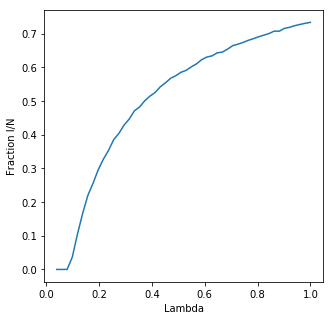

In [20]:
#plot results of simulation - Phase Diagram
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel('Lambda')
ax.set_ylabel('Fraction I/N')
ax.plot(SimIn['Lambdas'],SimIn['i']);

Zoom on the threshold

In [ ]:
#lambdas proposed
lambdas=np.linspace(0.059592,0.079184,10)

In [ ]:
#Gyllespie
lmean=np.zeros(50)
for e in range(50):
    print(50-e,'*** Lambda = ', lambdas[e])
    lmean[e]=ManySimulations(lambdas[e])

In [ ]:
#save data into a csv file
Val=np.vstack((np.array(lambdas),np.array(lmean)))
SimOut=pd.DataFrame(Val)
SimOut.to_csv('SimulationNet1Zoom.csv',index=None)

In [12]:
#read the results
SimIn = pd.read_csv('SimulationNet1Zoom.csv').T
SimIn.columns=['Lambdas','i']
SimIn.T

,0,1,2,3,4,5,6,7,8,9
Lambdas,0.079184,0.081361,0.083538,0.085715,0.087892,0.090068,0.092245,0.094422,0.096599,0.098776
i,0.000000,0.000300,0.001110,0.002220,0.008050,0.008370,0.013780,0.020780,0.024240,0.038560


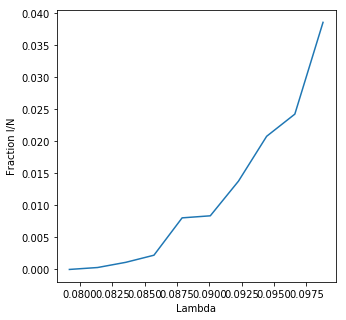

In [13]:
#plot results of simulation - Phase Diagram
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel('Lambda')
ax.set_ylabel('Fraction I/N')
ax.plot(SimIn['Lambdas'],SimIn['i']);

## Network 2

In [21]:
#setting parameters
inf=50
net=net2
c=m2deg/999

#### Study of the convergence

In [66]:
#convergence
x=np.arange(100,4100,100)
iConv=Convergence(x)

**** Iter= 100
**** Iter= 200
**** Iter= 300
**** Iter= 400
**** Iter= 500
**** Iter= 600
**** Iter= 700
**** Iter= 800
**** Iter= 900
**** Iter= 1000
**** Iter= 1100
**** Iter= 1200
**** Iter= 1300
**** Iter= 1400
**** Iter= 1500
**** Iter= 1600
**** Iter= 1700
**** Iter= 1800
**** Iter= 1900
**** Iter= 2000
**** Iter= 2100
**** Iter= 2200
**** Iter= 2300
**** Iter= 2400
**** Iter= 2500
**** Iter= 2600
**** Iter= 2700
**** Iter= 2800
**** Iter= 2900
**** Iter= 3000
**** Iter= 3100
**** Iter= 3200
**** Iter= 3300
**** Iter= 3400
**** Iter= 3500
**** Iter= 3600
**** Iter= 3700
**** Iter= 3800
**** Iter= 3900
**** Iter= 4000


In [67]:
#save data into a csv file
Val=np.vstack((np.array(x),np.array(iConv)))
ConvOut=pd.DataFrame(Val)
ConvOut.to_csv('ConvergenceNet2.csv',index=None)

In [22]:
#read the results
ConvIn = pd.read_csv('ConvergenceNet2.csv').T
ConvIn.index=np.arange(0,40)
ConvIn.loc[-1]=[0,inf/N]
ConvIn.index= ConvIn.index+1
ConvIn.sort_index(inplace=True)
ConvIn.columns=['Iter','i']
ConvIn.T

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
Iter,0.00,100.000,200.0,300.0,400.0,500.0,600.0,700.0,800.0,900.0,...,3100.0,3200.0,3300.0,3400.0,3500.0,3600.0,3700.0,3800.0,3900.0,4000.0
i,0.05,0.027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


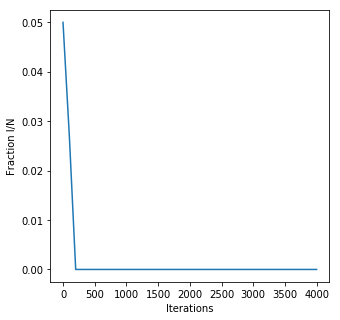

In [23]:
#plot results of convergence
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel('Iterations')
ax.set_ylabel('Fraction I/N')
ax.plot(ConvIn['Iter'],ConvIn['i']);

#### Simulation

In [24]:
#lambdas proposed
lambdas=np.linspace(0.04,1,50)

In [72]:
#Gyllespie
lmean=np.zeros(50)
for e in range(50):
    print(50-e,'*** Lambda = ', lambdas[e])
    lmean[e]=ManySimulations(lambdas[e])

50 *** Lambda =  0.04
49 *** Lambda =  0.05959183673469388
48 *** Lambda =  0.07918367346938776
47 *** Lambda =  0.09877551020408162
46 *** Lambda =  0.11836734693877551
45 *** Lambda =  0.13795918367346938
44 *** Lambda =  0.15755102040816327
43 *** Lambda =  0.17714285714285713
42 *** Lambda =  0.19673469387755102
41 *** Lambda =  0.2163265306122449
40 *** Lambda =  0.23591836734693877
39 *** Lambda =  0.2555102040816326
38 *** Lambda =  0.2751020408163265
37 *** Lambda =  0.2946938775510204
36 *** Lambda =  0.3142857142857142
35 *** Lambda =  0.3338775510204081
34 *** Lambda =  0.353469387755102
33 *** Lambda =  0.3730612244897959
32 *** Lambda =  0.3926530612244898
31 *** Lambda =  0.4122448979591836
30 *** Lambda =  0.4318367346938775
29 *** Lambda =  0.4514285714285714
28 *** Lambda =  0.47102040816326524
27 *** Lambda =  0.4906122448979591
26 *** Lambda =  0.5102040816326531
25 *** Lambda =  0.529795918367347
24 *** Lambda =  0.5493877551020409
23 *** Lambda =  0.568979591836734

In [73]:
#save data into a csv file
Val=np.vstack((np.array(lambdas),np.array(lmean)))
SimOut=pd.DataFrame(Val)
SimOut.to_csv('SimulationNet2.csv',index=None)

In [25]:
#read the results
SimIn = pd.read_csv('SimulationNet2.csv').T
SimIn.columns=['Lambdas','i']
SimIn.T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Lambdas,0.04,0.059592,0.079184,0.098776,0.118367,0.137959,0.157551,0.177143,0.196735,0.216327,...,0.823673,0.843265,0.862857,0.882449,0.902041,0.921633,0.941224,0.960816,0.980408,1.0000
i,0.00,0.000000,0.000000,0.000000,0.000650,0.024660,0.078900,0.123020,0.163360,0.198200,...,0.616720,0.620480,0.626340,0.627980,0.636220,0.640140,0.645780,0.648900,0.654840,0.6617


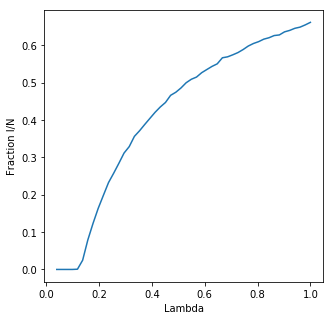

In [26]:
#plot results of simulation - Phase Diagram
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel('Lambda')
ax.set_ylabel('Fraction I/N')
ax.plot(SimIn['Lambdas'],SimIn['i']);

Zoom on the threshold

In [ ]:
#lambdas proposed
lambdas=np.linspace(0.098776,0.118367,10)

In [ ]:
#Gyllespie
lmean=np.zeros(50)
for e in range(50):
    print(50-e,'*** Lambda = ', lambdas[e])
    lmean[e]=ManySimulations(lambdas[e])

In [ ]:
#save data into a csv file
Val=np.vstack((np.array(lambdas),np.array(lmean)))
SimOut=pd.DataFrame(Val)
SimOut.to_csv('SimulationNet2Zoom.csv',index=None)

In [14]:
#read the results
SimIn = pd.read_csv('SimulationNet2Zoom.csv').T
SimIn.columns=['Lambdas','i']
SimIn.T

,0,1,2,3,4,5,6,7,8,9
Lambdas,0.098776,0.100953,0.10313,0.105306,0.107483,0.10966,0.111837,0.114013,0.11619,0.118367
i,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000260,0.00085,0.001170


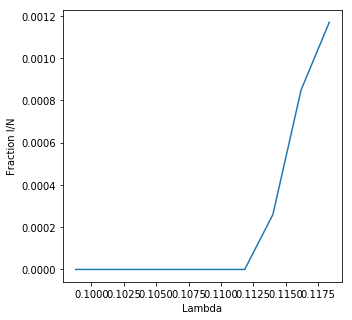

In [15]:
#plot results of simulation - Phase Diagram
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel('Lambda')
ax.set_ylabel('Fraction I/N')
ax.plot(SimIn['Lambdas'],SimIn['i']);

# Task 3

## Degree distribution

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


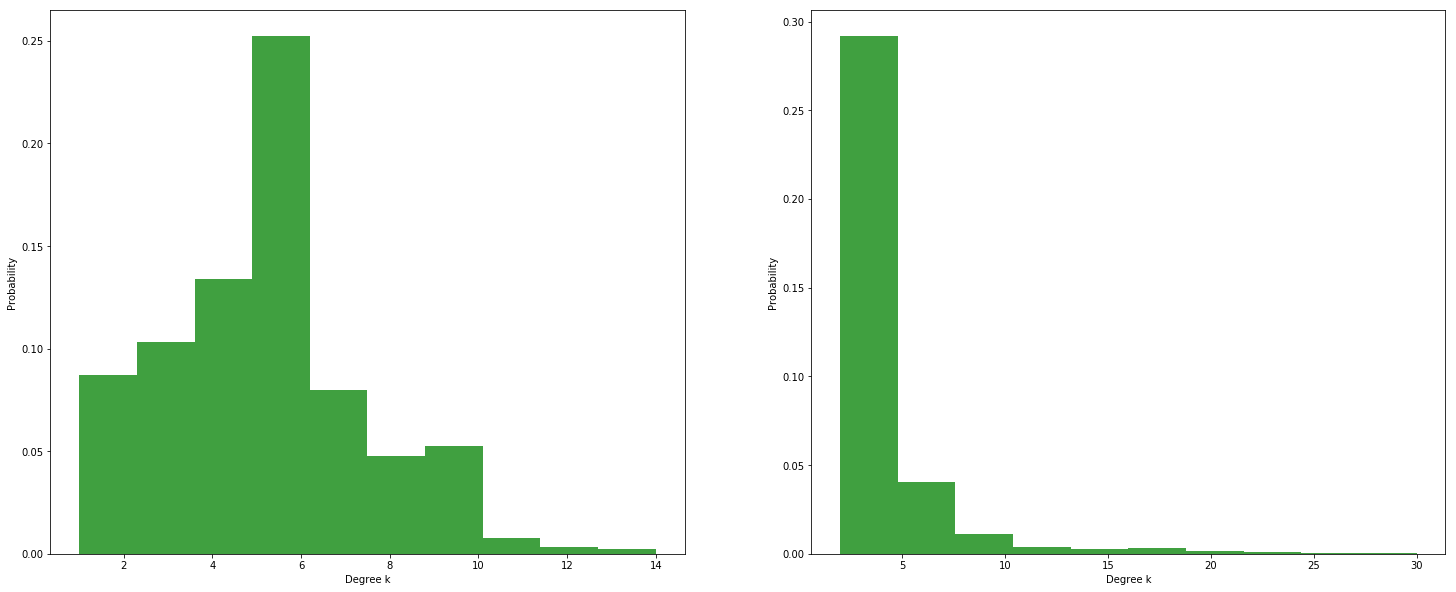

In [12]:
#degree distribution

fig, (ax1,ax2)=plt.subplots(nrows=1, ncols=2,figsize=(25,10))
    
ax1.hist(degree1['Degree'].values.reshape(1000,), normed='TRUE', histtype='barstacked',facecolor='g', alpha=0.75)
ax1.set_xlabel('Degree k')
ax1.set_ylabel('Probability')
ax2.hist(degree2['Degree'].values.reshape(1000,), normed='TRUE',histtype='barstacked',facecolor='g', alpha=0.75)
ax2.set_xlabel('Degree k')
ax2.set_ylabel('Probability');

## Page-Rank distribution

,Net1,Net2
<P-G>,0.001,0.001


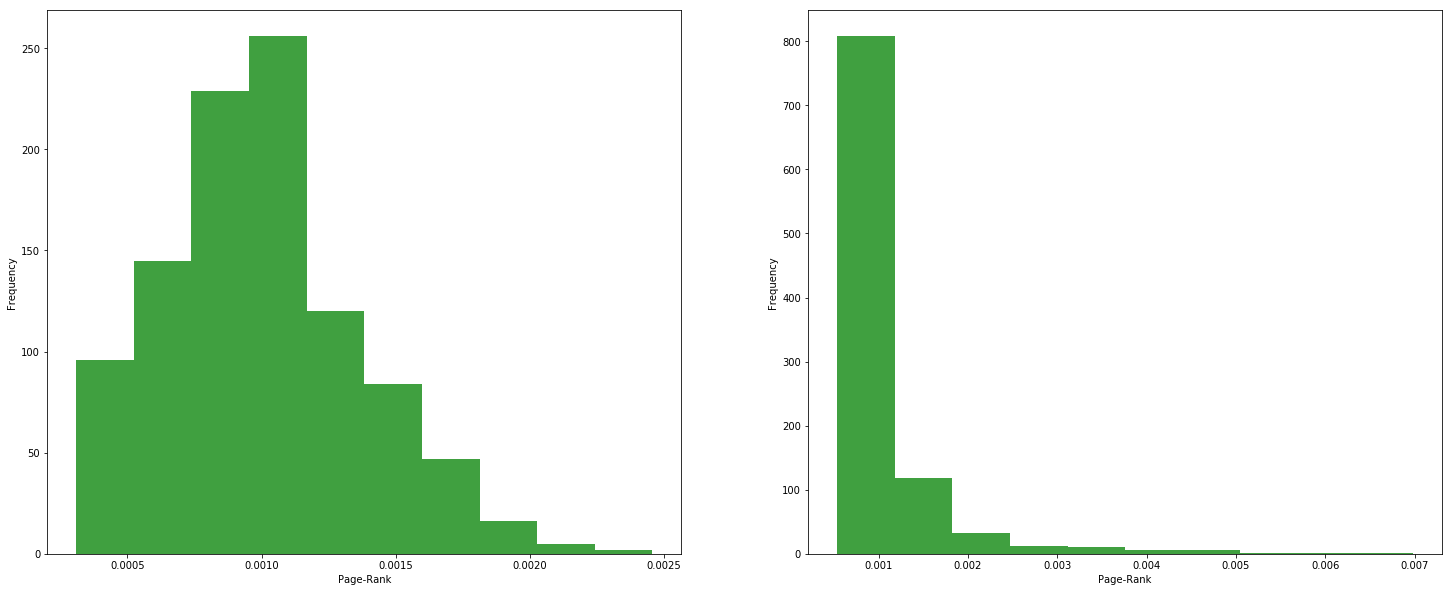

In [13]:
#page rank

pagerank1=pd.DataFrame.from_dict(nx.pagerank(G1), orient='index')
pagerank2=pd.DataFrame.from_dict(nx.pagerank(G2), orient='index')

fig, (ax1,ax2)=plt.subplots(nrows=1, ncols=2,figsize=(25,10))

n, bins, _ = ax1.hist(pagerank1.values.reshape(1000,),histtype='barstacked',facecolor='g', alpha=0.75)
ax1.set_xlabel('Page-Rank')
ax1.set_ylabel('Frequency')
ax2.hist(pagerank2.values.reshape(1000,), histtype='barstacked',facecolor='g', alpha=0.75)
ax2.set_xlabel('Page-Rank')
ax2.set_ylabel('Frequency');


m1pg=pagerank1.mean(axis=0).values 
m2pg=pagerank2.mean(axis=0).values 

pg=pd.DataFrame(np.array([m1pg,m2pg]).reshape(1,2), index=['<P-G>'], columns=['Net1','Net2'])
pg

## Clustering distribution

,Net1,Net2
C,0.004735,0.015817


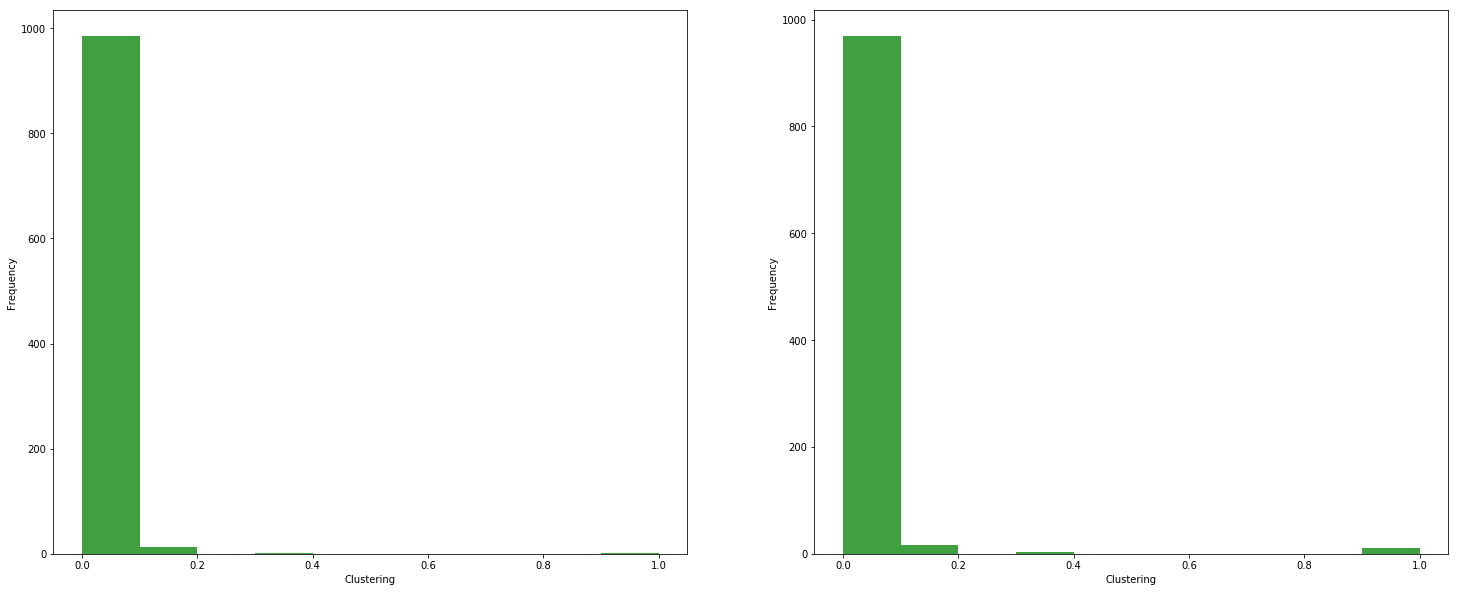

In [14]:
#clustering

clustering1=pd.DataFrame.from_dict(nx.algorithms.cluster.clustering(G1), orient='index')
clustering2=pd.DataFrame.from_dict(nx.algorithms.cluster.clustering(G2), orient='index')

fig, (ax1,ax2)=plt.subplots(nrows=1, ncols=2,figsize=(25,10))

n, bins, _ = ax1.hist(clustering1.values.reshape(1000,),histtype='barstacked',facecolor='g', alpha=0.75)
ax1.set_xlabel('Clustering')
ax1.set_ylabel('Frequency')
ax2.hist(clustering2.values.reshape(1000,), histtype='barstacked',facecolor='g', alpha=0.75)
ax2.set_xlabel('Clustering')
ax2.set_ylabel('Frequency');


m1clu=clustering1.mean(axis=0).values 
m2clu=clustering2.mean(axis=0).values 

clu=pd.DataFrame(np.array([m1clu,m2clu]).reshape(1,2), index=['C'], columns=['Net1','Net2'])
clu

## Betweennes centrality distribution

,Net1,Net2
BC,0.003405,0.003972


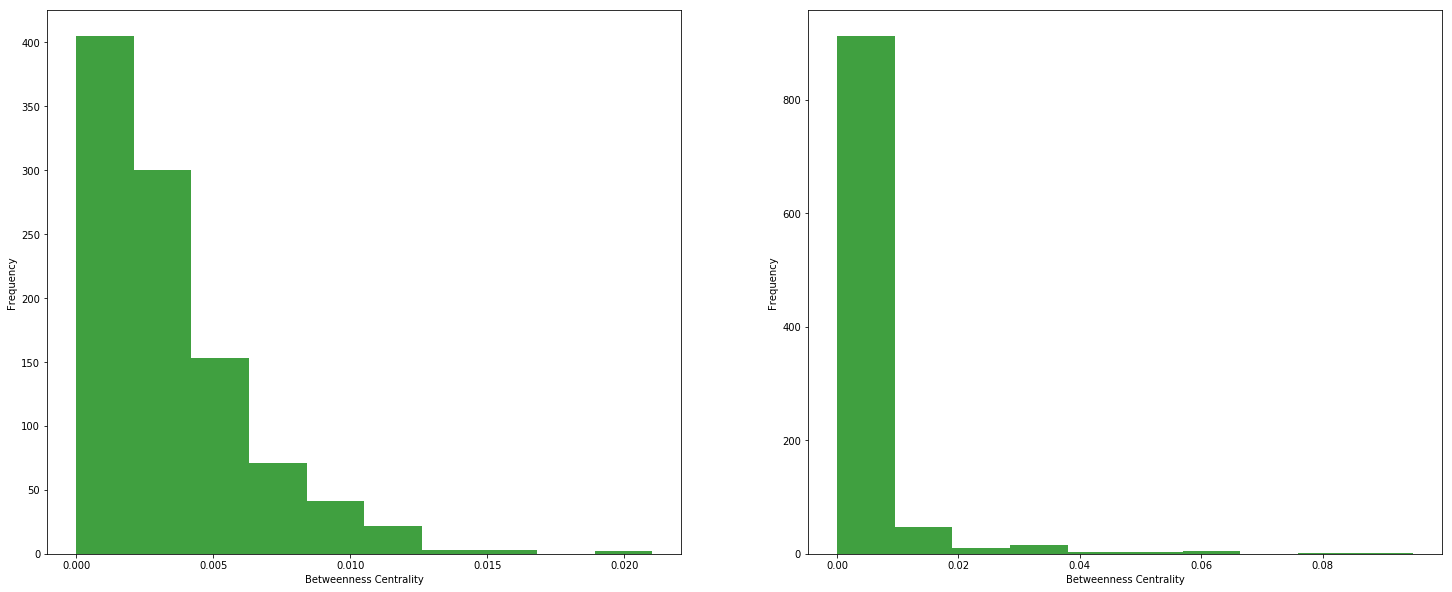

In [15]:
#betweenness

betweenness1=pd.DataFrame.from_dict(nx.betweenness_centrality(G1), orient='index')
betweenness2=pd.DataFrame.from_dict(nx.betweenness_centrality(G2), orient='index')

fig, (ax1,ax2)=plt.subplots(nrows=1, ncols=2,figsize=(25,10))

n, bins, _ = ax1.hist(betweenness1.values.reshape(1000,),histtype='barstacked',facecolor='g', alpha=0.75)
ax1.set_xlabel('Betweenness Centrality')
ax1.set_ylabel('Frequency')
ax2.hist(betweenness2.values.reshape(1000,), histtype='barstacked',facecolor='g', alpha=0.75)
ax2.set_xlabel('Betweenness Centrality')
ax2.set_ylabel('Frequency');


m1bet=betweenness1.mean(axis=0).values 
m2bet=betweenness2.mean(axis=0).values 

bet=pd.DataFrame(np.array([m1bet,m2bet]).reshape(1,2), index=['BC'], columns=['Net1','Net2'])
bet

# Task 4

The 1% of the total nodes are 10. We remove the 10 nodes with the highest degree in each network.

In [16]:
#remove nodes with highest degree
def RemoveDegree(net, degree):
    netbis=net.copy()
    highest10=np.sort(degree.sort_values(by=['Degree'],ascending=False).index[0:10])
    #print(highest10)
    #for deg in highest10:
     #   print(degree.loc[deg, 'Degree'],betweenness1.loc[deg, 0])
    for z in highest10:
        netbis=netbis[netbis['i']!=z]
        netbis=netbis[netbis['j']!=z]

    for i,j in zip(netbis['i'],netbis['j']):
        for z in highest10:
            if i==z: print('Error', i, 'i')
            if j==z: print('Error', j, 'j')
                  
    return netbis

In [17]:
#remove nodes with highest betweenness
def RemoveBetweenness(net, betweenness):
    netbis=net.copy()
    highest10=np.sort(betweenness.sort_values(by=0, ascending=False).index[0:10])
    #print(highest10)
    #for deg in highest10:
     #   print(degree1.loc[deg, 'Degree'],betweenness.loc[deg, 0])
    for z in highest10:
        netbis=netbis[netbis['i']!=z]
        netbis=netbis[netbis['j']!=z]

    for i,j in zip(netbis['i'],netbis['j']):
        for z in highest10:
            if i==z: print('Error', i, 'i')
            if j==z: print('Error', j, 'j')
                  
    return netbis

In [18]:
#network 1
net1bis=RemoveDegree(net1, degree1)
#to simulate without betweenness uncomment next line
#net1bis=RemoveBetweenness(net1, betweenness1)

In [23]:
#network 2
net2bis=RemoveDegree(net2, degree2)
#to simulate without betweenness uncomment next line
#net2bis=RemoveBetweenness(net2, betweenness2)

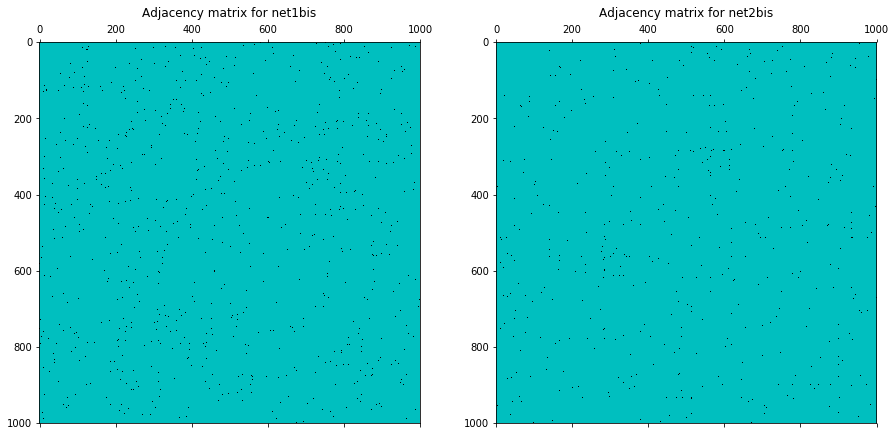

In [24]:
#Adjacency matrix for net1
d1bis=1000
am1bis=np.zeros((d1bis,d1bis))

am1bis[net1bis['i'],net1bis['j']]=1
am1bis[net1bis['j'],net1bis['i']]=1

am1bis=pd.DataFrame(am1bis)



#Adjacency matrix for net2
d2bis=1000
am2bis=np.zeros((d2bis,d2bis))

am2bis[net2bis['i'],net2bis['j']]=1
am2bis[net2bis['j'],net2bis['i']]=1

am2bis=pd.DataFrame(am2bis)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

cmap = ListedColormap(['c', 'k'])

ax1.matshow(am1bis, cmap=cmap)
ax1.set_title('Adjacency matrix for net1bis')
ax2.matshow(am2bis, cmap=cmap)
ax2.set_title('Adjacency matrix for net2bis');

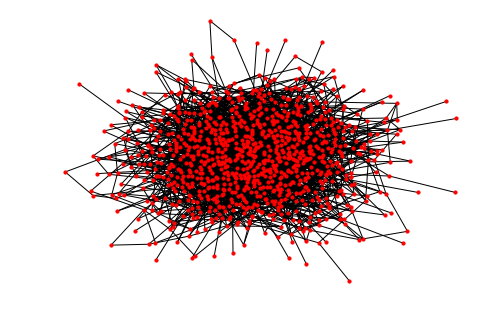

In [25]:
#creating the graphs from the from adjacency matrix
G1bis=nx.Graph(am1bis)
G2bis=nx.Graph(am2bis)

#remove isolated nodes
G1bis.remove_nodes_from(list(nx.isolates(G1bis)))
G2bis.remove_nodes_from(list(nx.isolates(G2bis)))


#fig1, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20,20))
nx.draw(G1bis, node_size=10)

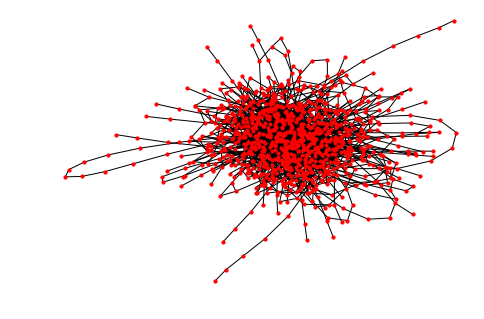

In [26]:
nx.draw(G2bis, node_size=10)

In [27]:
#computing degree

#net1
l=[]
for i in np.array(G1bis.degree())[:,1]:
    l.append(int(i))

degree1bis=pd.DataFrame(np.array(l), columns=['Degree'])

  
#average of the degree
m1degbis=degree1bis['Degree'].mean()


#net2
l=[]
for i in np.array(G2bis.degree())[:,1]:
    l.append(int(i))

degree2bis=pd.DataFrame(np.array(l), columns=['Degree'])

    
#average of the degree
m2degbis=degree2bis['Degree'].mean()

## Running the simulation

### Network 1

In [30]:
mu=0.5

#setting parameters
N=G1bis.number_of_nodes()
inf=50
net=net1bis
c=m1degbis/(N-1)

In [31]:
#lambdas proposed
lambdas=np.linspace(0.04,1,50)

In [32]:
#Gyllespie
lmean=np.zeros(50)
for e in range(50):
    print(50-e,'*** Lambda = ', lambdas[e])
    lmean[e]=ManySimulations(lambdas[e])

50 *** Lambda =  0.04
49 *** Lambda =  0.05959183673469388
48 *** Lambda =  0.07918367346938776
47 *** Lambda =  0.09877551020408162
46 *** Lambda =  0.11836734693877551
45 *** Lambda =  0.13795918367346938
44 *** Lambda =  0.15755102040816327
43 *** Lambda =  0.17714285714285713
42 *** Lambda =  0.19673469387755102
41 *** Lambda =  0.2163265306122449
40 *** Lambda =  0.23591836734693877
39 *** Lambda =  0.2555102040816326
38 *** Lambda =  0.2751020408163265
37 *** Lambda =  0.2946938775510204
36 *** Lambda =  0.3142857142857142
35 *** Lambda =  0.3338775510204081
34 *** Lambda =  0.353469387755102
33 *** Lambda =  0.3730612244897959
32 *** Lambda =  0.3926530612244898
31 *** Lambda =  0.4122448979591836
30 *** Lambda =  0.4318367346938775
29 *** Lambda =  0.4514285714285714
28 *** Lambda =  0.47102040816326524
27 *** Lambda =  0.4906122448979591
26 *** Lambda =  0.5102040816326531
25 *** Lambda =  0.529795918367347
24 *** Lambda =  0.5493877551020409
23 *** Lambda =  0.568979591836734

In [33]:
#save data into a csv file
Val=np.vstack((np.array(lambdas),np.array(lmean)))
SimOut=pd.DataFrame(Val)
SimOut.to_csv('SimulationNet1Bis.csv',index=None)

In [34]:
#read the results
SimIn = pd.read_csv('SimulationNet1Bis.csv').T
SimIn.columns=['Lambdas','i']
SimIn.T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Lambdas,0.04,0.059592,0.079184,0.098776,0.118367,0.137959,0.157551,0.177143,0.196735,0.216327,...,0.823673,0.843265,0.862857,0.882449,0.902041,0.921633,0.941224,0.960816,0.980408,1.000000
i,0.00,0.000000,0.000000,0.021768,0.088990,0.149980,0.197475,0.246162,0.282505,0.316061,...,0.692606,0.695111,0.703818,0.709818,0.710505,0.716141,0.722485,0.722687,0.726727,0.731717


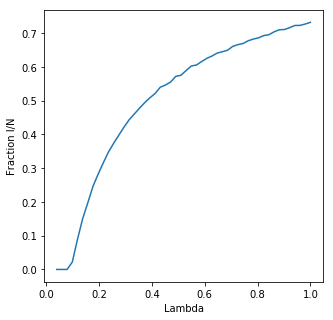

In [35]:
#plot results of simulation - Phase Diagram
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel('Lambda')
ax.set_ylabel('Fraction I/N')
ax.plot(SimIn['Lambdas'],SimIn['i']);

Zoom on the threshold

In [38]:
#lambdas proposed
lambdas=np.linspace(0.079184,0.098776,10)

In [39]:
#Gyllespie
lmean=np.zeros(10)
for e in range(10):
    print(10-e,'*** Lambda = ', lambdas[e])
    lmean[e]=ManySimulations(lambdas[e])

50 *** Lambda =  0.079184
49 *** Lambda =  0.0813608888888889
48 *** Lambda =  0.08353777777777778
47 *** Lambda =  0.08571466666666668
46 *** Lambda =  0.08789155555555556
45 *** Lambda =  0.09006844444444445
44 *** Lambda =  0.09224533333333333
43 *** Lambda =  0.09442222222222223
42 *** Lambda =  0.09659911111111111
41 *** Lambda =  0.098776


In [40]:
#save data into a csv file
Val=np.vstack((np.array(lambdas),np.array(lmean)))
SimOut=pd.DataFrame(Val)
SimOut.to_csv('SimulationNet1BisZoom.csv',index=None)

In [41]:
#read the results
SimIn = pd.read_csv('SimulationNet1BisZoom.csv').T
SimIn.columns=['Lambdas','i']
SimIn.T

,0,1,2,3,4,5,6,7,8,9
Lambdas,0.079184,0.081361,0.083538,0.085715,0.087892,0.090068,0.092245,0.094422,0.096599,0.098776
i,0.000000,0.000000,0.000485,0.000141,0.001869,0.003566,0.007535,0.010788,0.016354,0.024949


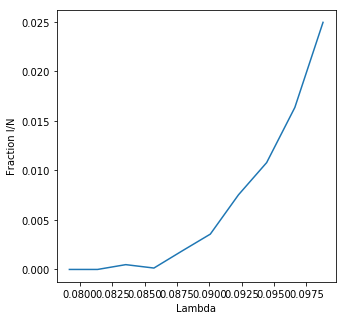

In [42]:
#plot results of simulation - Phase Diagram
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel('Lambda')
ax.set_ylabel('Fraction I/N')
ax.plot(SimIn['Lambdas'],SimIn['i']);

### Network 2

In [28]:
mu=0.5

#setting parameters
N=G2bis.number_of_nodes()
inf=50
net=net2bis
c=m2degbis/(N-1)

In [29]:
#lambdas proposed
lambdas=np.linspace(0.04,1,50)

In [ ]:
#Gyllespie
lmean=np.zeros(50)
for e in range(50):
    print(50-e,'*** Lambda = ', lambdas[e])
    lmean[e]=ManySimulations(lambdas[e])

50 *** Lambda =  0.04


In [ ]:
#save data into a csv file
Val=np.vstack((np.array(lambdas),np.array(lmean)))
SimOut=pd.DataFrame(Val)
SimOut.to_csv('SimulationNet2Bis.csv',index=None)

In [16]:
#read the results
SimIn = pd.read_csv('SimulationNet2Bis.csv').T
SimIn.columns=['Lambdas','i']
SimIn.T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Lambdas,0.04,0.059592,0.079184,0.098776,0.118367,0.137959,0.157551,0.177143,0.196735,0.216327,...,0.823673,0.843265,0.862857,0.882449,0.902041,0.921633,0.941224,0.960816,0.980408,1.000000
i,0.00,0.000000,0.000000,0.000000,0.000000,0.001996,0.030101,0.074772,0.112361,0.150355,...,0.586890,0.591793,0.603972,0.603891,0.611976,0.616717,0.622391,0.623728,0.634914,0.640486


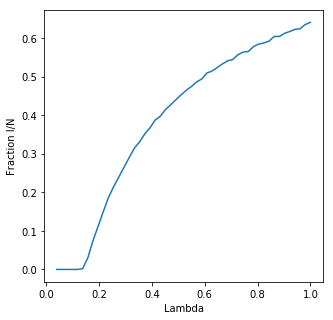

In [17]:
#plot results of simulation - Phase Diagram
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel('Lambda')
ax.set_ylabel('Fraction I/N')
ax.plot(SimIn['Lambdas'],SimIn['i']);

Zoom on the threshold

In [ ]:
#lambdas proposed
lambdas=np.linspace(0.118367,0.137959,10)

In [ ]:
#Gyllespie
lmean=np.zeros(10)
for e in range(10):
    print(10-e,'*** Lambda = ', lambdas[e])
    lmean[e]=ManySimulations(lambdas[e])

In [ ]:
#save data into a csv file
Val=np.vstack((np.array(lambdas),np.array(lmean)))
SimOut=pd.DataFrame(Val)
SimOut.to_csv('SimulationNet2BisZoom.csv',index=None)

In [18]:
#read the results
SimIn = pd.read_csv('SimulationNet2BisZoom.csv').T
SimIn.columns=['Lambdas','i']
SimIn.T

,0,1,2,3,4,5,6,7,8,9
Lambdas,0.118367,0.120544,0.122721,0.124898,0.127075,0.129251,0.131428,0.133605,0.135782,0.137959
i,0.000000,0.000000,0.000000,0.000000,0.000162,0.000426,0.000122,0.000770,0.000648,0.001996


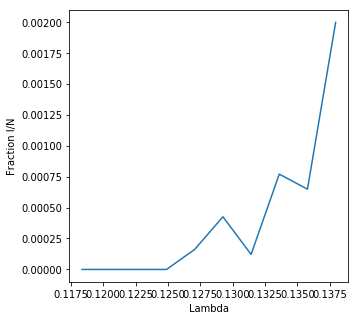

In [19]:
#plot results of simulation - Phase Diagram
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel('Lambda')
ax.set_ylabel('Fraction I/N')
ax.plot(SimIn['Lambdas'],SimIn['i']);

# Task 5

The equations of the SIR model are:

$$\frac{d i}{d t}=\beta \, s(t)\, i(t) -\gamma \,i(t)$$

$$\frac{d s}{d t}=-\beta\, s(t)\, i(t) $$

$$\frac{d r}{d t}= \gamma\, i(t)$$

To compute $\gamma$ and $\beta$:

$$\beta = -\frac{s(t)-s(0)}{\int_0^t s(\tau)\,i(\tau)d\tau}$$

$$\gamma = \frac{r(t)}{\int_0^t i(\tau) d\tau}$$

In [39]:
file = pd.read_csv('cases_100locations_first77days.txt', sep='\s', engine='python')
file.head()

,"#location_id,","days,","frac_S,","frac_I,",frac_R
0,1,0,0.989,0.011,0.000
1,1,1,0.988,0.012,0.000
2,1,2,0.986,0.014,0.000
3,1,3,0.986,0.014,0.000
4,1,4,0.985,0.014,0.001


In [40]:
#reshaping the array
val=np.array(file.values)
val=val.reshape(100,77,5)

meanval=np.mean(val,axis=0)

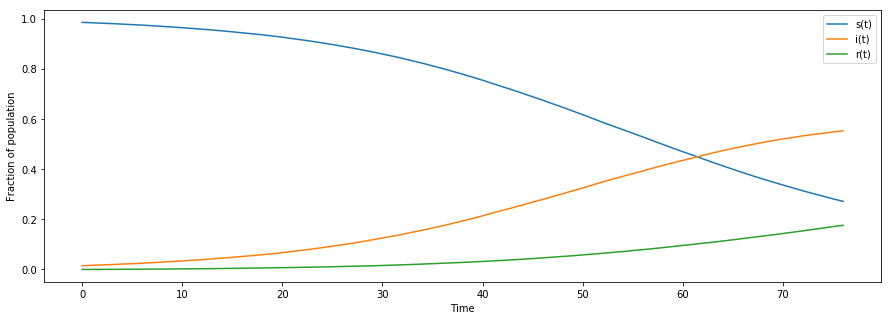

In [41]:
#plot the evolution
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(np.arange(77),meanval[:,2], label='s(t)')
ax.plot(np.arange(77),meanval[:,3], label='i(t)')
ax.plot(np.arange(77),meanval[:,4], label='r(t)')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Fraction of population')
plt.show()

In [42]:
#computation of beta, gamma and R0
beta=np.zeros(100)
gamma=np.zeros(100)

for i in range(100):
    ib=0
    ig=0
    for j in range(77):
        st=val[i,j,2]
        it=val[i,j,3]
        ib += st*it
        ig += it
     
    s0=val[i,0,2]
    sT=val[i,76,2]
    rT=val[i,76,4]
    beta[i] = (s0-sT)/ib
    gamma[i] = rT/ig
    
R0=beta/gamma

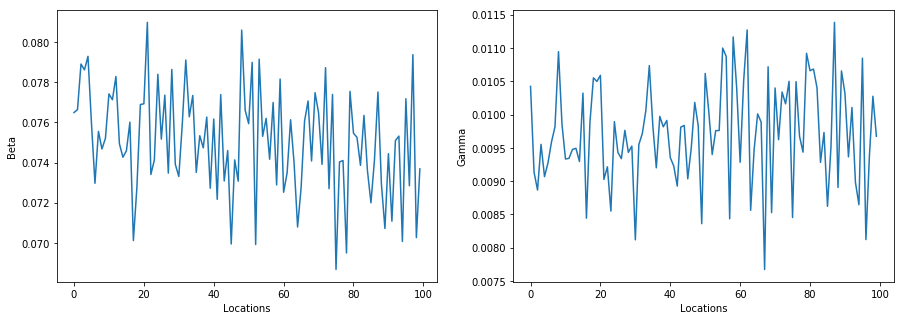

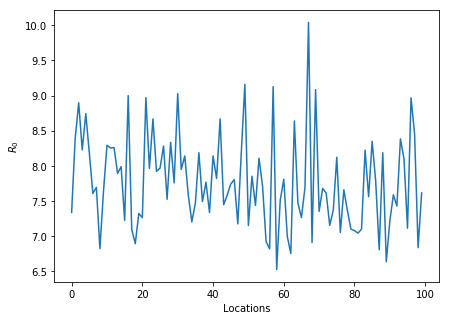

In [43]:
#plot the results

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax1.plot(np.arange(100),beta)
ax1.set_ylabel('Beta')
ax1.set_xlabel('Locations')
ax2.plot(np.arange(100),gamma)
ax2.set_ylabel('Gamma')
ax2.set_xlabel('Locations')
ig, ax3 = plt.subplots(figsize=(6.9,5))
ax3.plot(np.arange(100),R0)
ax3.set_ylabel('$R_0$')
ax3.set_xlabel('Locations')
plt.show()

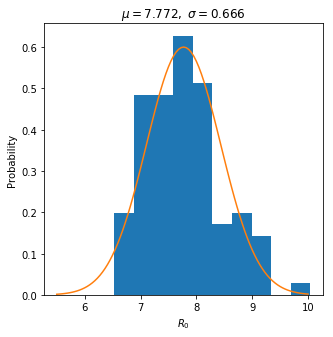

In [44]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(R0, histtype='barstacked',normed=1)
# best fit of data
(mu, sigma) = norm.fit(R0)

x=np.linspace(5.5,10,100)
y=np.exp(-(((x-mu)/sigma)**2)/2)/np.sqrt(2*ma.pi*sigma**2)

ax.plot(x,y)

ax.set_xlabel('$R_0$')
ax.set_ylabel('Probability')
ax.set_title('$\mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))

plt.show()